In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import figure
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('archive (2).zip', compression='zip')

# 1.Data exploration  

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Null percentage by columns

In [6]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f"{col} - {round(percent_missing*100, 2)}%")

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 29.91%
cast - 9.37%
country - 9.44%
date_added - 0.11%
release_year - 0.0%
rating - 0.05%
duration - 0.03%
listed_in - 0.0%
description - 0.0%


# 2.Grouping by some columns like type, rating, country and etc. to get some general insights 

In [7]:
types = df.groupby('type')\
    .agg({'show_id':'count'})\
    .rename(columns={'show_id':'number_of'})
types

,number_of
type,
Movie,6131
TV Show,2676


In [8]:
#Here we did not include the last 3 rows because they were not categorized as ratings
ratings = df.groupby('rating')\
    .agg({'show_id':'count'})\
    .rename(columns={'show_id':'number_of'})\
    .sort_values('number_of', ascending=False)\
    .head(14)
ratings

,number_of
rating,
TV-MA,3207
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


In [9]:
countries_top10 = df.groupby('country')\
    .agg({'show_id':'count'})\
    .rename(columns={'show_id':'number_of'})\
    .sort_values('number_of', ascending=False)\
    .head(10)
countries_top10

,number_of
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [10]:
seasons = df.query("type=='TV Show'")\
    .groupby('duration')\
    .agg({'show_id':'count'})\
    .sort_values('show_id', ascending=False)\
    .rename(columns={'show_id':'number_of'})
seasons

,number_of
duration,
1 Season,1793
2 Seasons,425
3 Seasons,199
4 Seasons,95
5 Seasons,65
6 Seasons,33
7 Seasons,23
8 Seasons,17
9 Seasons,9


In [12]:
movie_dur = df.query("type=='Movie'")\
    .groupby('duration')\
    .agg({'show_id':'count'})\
    .sort_values('show_id', ascending=False)\
    .rename(columns={'show_id':'number_of'})
movie_dur.head(10)

,number_of
duration,
90 min,152
93 min,146
94 min,146
97 min,146
91 min,144
95 min,137
96 min,130
92 min,129
102 min,122


In [14]:
df['year'] = df['date_added'].str[-4:]

In [18]:
added_by_year = df.groupby('year')\
    .agg({'show_id':'count'})\
    .rename(columns={'show_id':'number_of'})
added_by_year

,number_of
year,
2008,2
2009,2
2010,1
2011,13
2012,3
2013,11
2014,24
2015,82
2016,429


In [19]:
#Here we count the number of appearences by each actor by creating a dictionary and then dataframe out of it
actors = []
num_of_app = {}
for cast in df[df.cast.isnull()==False].cast:
    for actor in cast.split(', '):
        actors.append(actor)
for actor in actors:
    num_of_app[actor] = num_of_app.get(actor, 0) + 1

In [21]:
#Top 10 actors
num_app = pd.DataFrame(num_of_app.items(), columns=['Actor', 'Appearences'])
top_actors = num_app.sort_values('Appearences', ascending=False).head(10)
top_actors

,Actor,Appearences
1433,Anupam Kher,43
782,Shah Rukh Khan,35
303,Julie Tejwani,33
1634,Naseeruddin Shah,32
4942,Takahiro Sakurai,32
304,Rupa Bhimani,31
1558,Akshay Kumar,30
11643,Om Puri,30
4468,Yuki Kaji,29
7422,Paresh Rawal,28


In [22]:
#We do the same thing with directors
directors = []
num_of_dir = {}
for director in df[df.director.isnull()==False].director:
    directors.append(director)
for director in directors:
    num_of_dir[director] = num_of_dir.get(director, 0) + 1

In [23]:
#Top 10 directors
num_dir = pd.DataFrame(num_of_dir.items(), columns=['Director', 'Num of movies'])
top_directors = num_dir.sort_values('Num of movies', ascending=False).head(10)
top_directors

,Director,Num of movies
248,Rajiv Chilaka,19
2436,"Raúl Campos, Jan Suter",18
1418,Marcus Raboy,16
552,Suhas Kadav,16
1509,Jay Karas,14
883,Cathy Garcia-Molina,13
798,Martin Scorsese,12
310,Youssef Chahine,12
1947,Jay Chapman,12
24,Steven Spielberg,11


# 3.Visualization

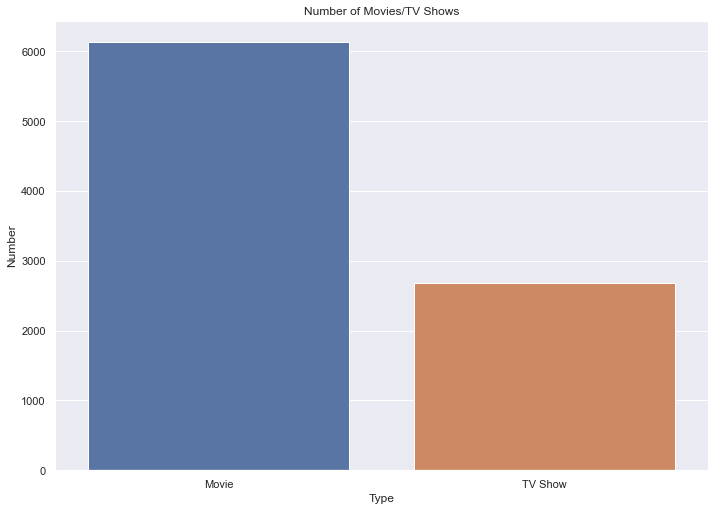

In [35]:
sns.barplot(x=types.index, y=types.number_of)
sns.set(style="darkgrid")
plt.title('Number of Movies/TV Shows')
plt.ylabel('Number')
plt.xlabel('Type');

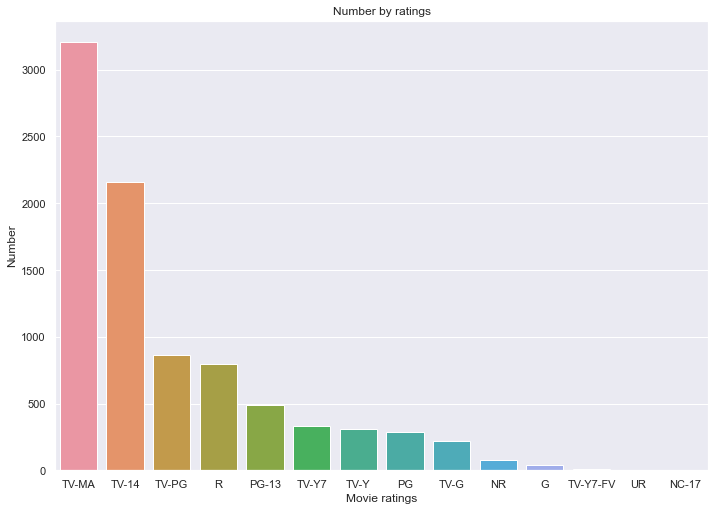

In [34]:
sns.barplot(x=ratings.index, y=ratings.number_of)
sns.set(style="darkgrid")
plt.title('Number by ratings')
plt.ylabel('Number')
plt.xlabel('Movie ratings');

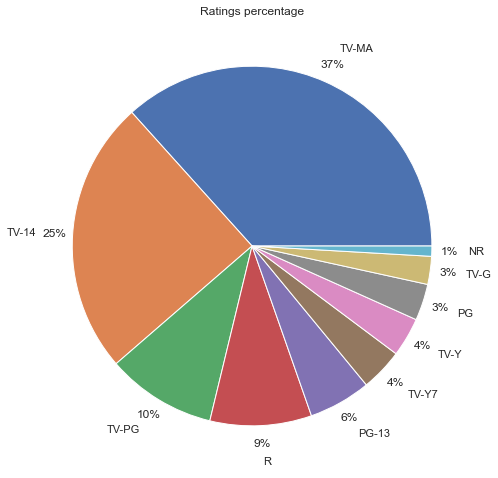

In [36]:
#Ratings by percentage
sns.set(style="darkgrid")
plt.pie(ratings.number_of.head(10), labels=ratings.head(10).index,autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)
plt.title('Ratings percentage');

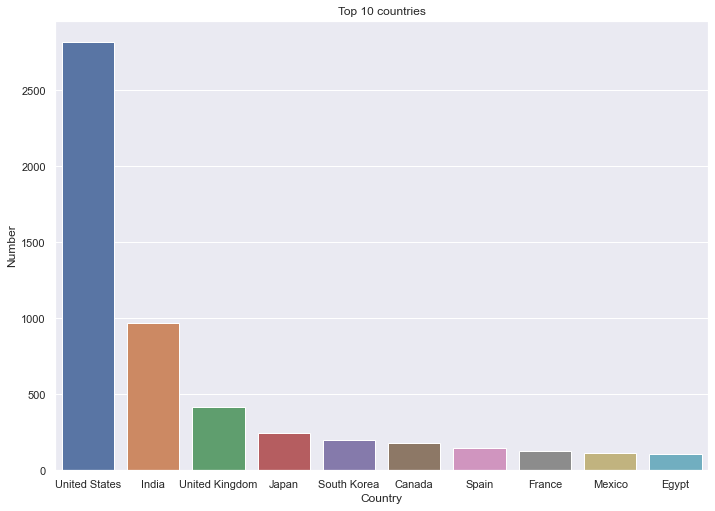

In [37]:
sns.barplot(x=countries_top10.index, y=countries_top10.number_of)
sns.set(style="darkgrid")
plt.title('Top 10 countries')
plt.ylabel('Number')
plt.xlabel('Country');

C:\Users\Medet\AppData\Local\Temp/ipykernel_21892/1884083687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].astype('str')
C:\Users\Medet\AppData\Local\Temp/ipykernel_21892/1884083687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration'] = df_movies['duration'].apply(lambda x: x.split(" ")[0]).fillna(0)
D:\Programs\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be remo

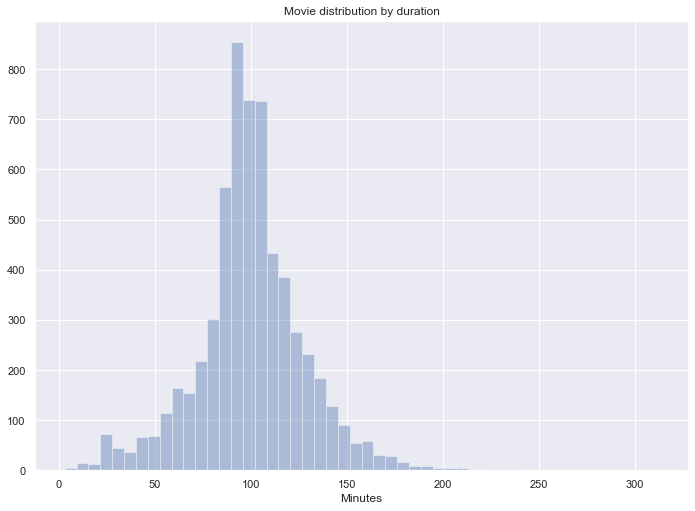

In [38]:
df_movies = df.query("type=='Movie'")
df_movies['duration'] = df_movies['duration'].astype('str')
df_movies['duration'] = df_movies['duration'].apply(lambda x: x.split(" ")[0]).fillna(0)
sns.distplot(x=df_movies.duration, kde=False)
sns.set(style="darkgrid")
plt.title('Movie distribution by duration')
plt.xlabel('Minutes');